<a href="https://colab.research.google.com/github/Paritoshyadav/Credit-Card-Fraud-Detection./blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [65.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [103 kB]
Get:11 http://security

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           9140  
matheusfreitag/gas-prices-in-brazil                         Gas Prices in Brazil                                  3MB  2019-07-12 16:23:52           5010  
jealousleopard/goodreadsbooks                               Goodreads-books                                     632KB  2019-06-14 16:35:05           8684  
wkirgsn/electric-motor-temperature                          Electric Motor Temperature                           47MB  2019-06-19 11:12:41           3298  
jolasa/waves-measuring-buoys-data-mooloolaba                Wave

In [0]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 69.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 84.7MB/s]


In [0]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
dataset=pd.read_csv('creditcard.csv')

In [0]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

speechless imbalance...... highly skewed
0.172% fraud cases


(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

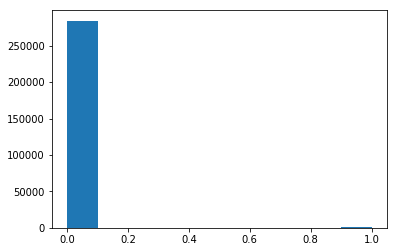

In [0]:
plt.hist(dataset['Class'])

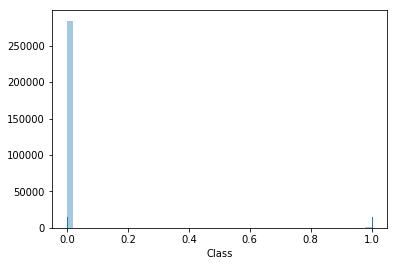

In [0]:
sns.distplot(dataset['Class'], kde=False, rug=True)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc= StandardScaler()
dataset['scaledAmount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [0]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaledAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [0]:
dataset=dataset.drop(columns=['Amount'])

In [0]:
y=dataset['Class']

In [0]:
dataset=dataset.drop(columns=['Class'])

In [0]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(dataset,y,test_size=0.3,random_state=0)

In [0]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [0]:
y_test.value_counts()

0    85296
1      147
Name: Class, dtype: int64

In [0]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaledAmount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398


In [0]:
x_train.shape

(199364, 30)

In [0]:
y_train.shape

(199364,)

In [0]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [0]:
x_train

array([[ 1.13921000e+05, -1.32066260e-01,  1.07043551e-01, ...,
         3.06394657e-01,  7.48169663e-02, -1.61761045e-01],
       [ 1.35319000e+05,  2.12599441e+00,  1.42074055e-02, ...,
        -6.82673794e-02, -5.76775883e-02, -3.45313182e-01],
       [ 1.25498000e+05, -8.66939700e-02,  1.66240223e-01, ...,
        -1.20157065e+00, -1.13993068e+00,  3.26845069e-01],
       ...,
       [ 7.66160000e+04,  1.51260229e+00, -9.49435315e-01, ...,
        -1.41537086e-03,  3.66494418e-03, -2.13696185e-01],
       [ 9.72530000e+04,  1.79886333e+00, -1.69979073e+00, ...,
        -3.36155803e-02, -3.24705125e-02,  3.31682753e-01],
       [ 7.48870000e+04, -5.89399721e-01,  7.47828393e-01, ...,
         8.65917860e-02,  1.18083774e-01, -2.89299995e-01]])

In [0]:
x_train.shape

(199364, 30)

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
model=Sequential()

W0817 11:43:22.225238 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model.add(Dense(units=16,input_dim=30 ,activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

W0817 11:43:26.868875 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 11:43:26.881676 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 11:43:26.910334 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0817 11:43:26.919771 140657337874304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
model

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0817 11:43:35.227077 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 11:43:35.254809 140657337874304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0817 11:43:35.261632 140657337874304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 59s 295us/step - loss: 0.0390 - acc: 0.9976
Epoch 2/5
199364/199364 [==============================] - 57s 284us/step - loss: 0.0279 - acc: 0.9983
Epoch 3/5
199364/199364 [==============================] - 55s 274us/step - loss: 0.0279 - acc: 0.9983
Epoch 4/5
199364/199364 [==============================] - 54s 272us/step - loss: 0.0279 - acc: 0.9983
Epoch 5/5
199364/199364 [==============================] - 55s 278us/step - loss: 0.0279 - acc: 0.9983


In [0]:
score = model.evaluate(x_test,y_test)

85443/85443 [==============================] - 4s 42us/step


In [0]:
score

[0.02773039776138444, 0.9982795547909132]

99% accuracy ..... not suprsing since 0.172% data is 1(fraud)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
y_pred=model.predict(x_test)

In [0]:
cm = confusion_matrix(y_test,y_pred.round())

In [0]:
cm

array([[85296,     0],
       [  147,     0]])

In [0]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       147

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf=RandomForestClassifier(100)

In [0]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_test.shape


(85443,)

In [0]:
predrf=rf.predict(x_test)

In [0]:
cm_rf=confusion_matrix(y_test,predrf)

In [0]:
cm_rf

array([[85289,     7],
       [   36,   111]])

In [0]:
#@title Time for sampling
#Oversampling


In [0]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 32.6MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
x_re,y_re=SMOTE().fit_sample(dataset,y)

In [0]:
y_re

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
x_re=pd.DataFrame(x_re)
y_re=pd.DataFrame(y_re)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.3,random_state=0)

In [0]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [0]:
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 104s 261us/step - loss: 7.9050 - acc: 0.4999
Epoch 2/5
398041/398041 [==============================] - 99s 249us/step - loss: 7.7369 - acc: 0.4987
Epoch 3/5
398041/398041 [==============================] - 98s 247us/step - loss: 6.3406 - acc: 0.4999
Epoch 4/5
398041/398041 [==============================] - 99s 249us/step - loss: 7.0226 - acc: 0.4993
Epoch 5/5
398041/398041 [==============================] - 99s 248us/step - loss: 6.6333 - acc: 0.5008


In [0]:
Pred_re=model.predict(x_test)

In [0]:
cm = confusion_matrix(y_test,Pred_re.round())
print(cm)

[[   41 85131]
 [    0 85417]]


In [0]:
#@title Great Now there is almost non False postive which reduce the work of department


In [0]:
print(classification_report(y_test,Pred_re.round()))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     85172
           1       0.50      1.00      0.67     85417

    accuracy                           0.50    170589
   macro avg       0.75      0.50      0.33    170589
weighted avg       0.75      0.50      0.33    170589



better recall model